In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob, Word
from wordcloud import WordCloud

In [10]:
df = pd.read_csv("iphone14_customer_review.csv", encoding="ISO-8859-1")


In [12]:
print(df.head())

                  title  rating  \
0              Terrific     5.0   
1             Fabulous!     5.0   
2         Great product     5.0   
3             Just wow!     5.0   
4  Good quality product     4.0   

                                              review     customer_name  \
0  I bought iPhone 14 in big billion days. Very h...  Sathvick Kumaran   
1  Best smart phone under this price range compar...     Rahul Prasad    
2  Nice camera but battery drain fast specially o...  Tara singh mehra   
3                                      GoodREAD MORE          Avi Nash   
4                              Awesome ???READ MORE  Ashwini  biswal    

           dates       customer_location  
0   4 months ago   The Nilgiris District  
1      Jan, 2023                 Debipur  
2  11 months ago                Ramnagar  
3      Feb, 2023               Bengaluru  
4      Oct, 2022             Bhubaneswar  


In [13]:
# Check the shape of the dataset
print("\nDataset Shape:", df.shape)


Dataset Shape: (1024, 6)


In [14]:
# Display dataset info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1024 non-null   object 
 1   rating             952 non-null    float64
 2   review             1024 non-null   object 
 3   customer_name      1024 non-null   object 
 4   dates              1024 non-null   object 
 5   customer_location  1024 non-null   object 
dtypes: float64(1), object(5)
memory usage: 48.1+ KB


In [15]:
# Display column names
print("\nDataset Columns:", df.columns)


Dataset Columns: Index(['title', 'rating', 'review', 'customer_name', 'dates',
       'customer_location'],
      dtype='object')


In [16]:

if 'review' in df.columns:
    print("\nFirst 5 reviews:")
    print(df['review'].head())


In [22]:

# Text preprocessing
print("\nStarting Text Preprocessing...")
# Lowercasing and removing punctuations
df['review'] = df['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review'] = df['review'].str.replace('[^\w\s]', '', regex=True)


Starting Text Preprocessing...


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:

# Removing stopwords
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

In [27]:
 # Lemmatization
df['review'] = df['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [29]:
  # Display the processed text
print("\nProcessed Reviews (First 5):")
print(df['review'].head())



Processed Reviews (First 5):
0    bought iphone 14 big billion day happy excelle...
1    best smart phone price range compare phone 202...
2    nice camera battery drain fast specially video...
3                                             goodread
4                                         awesome read
Name: review, dtype: object



Generating Word Cloud...


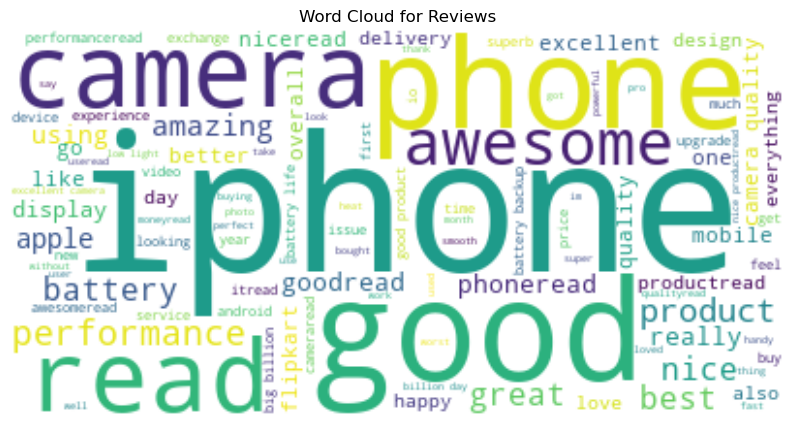

In [30]:
# Generate a word cloud (if reviews exist)
print("\nGenerating Word Cloud...")
all_reviews = " ".join(df['review'])
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=100).generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Reviews")
plt.show()

In [34]:
# Example: Analyzing review scores (assuming a column named 'Score')
if 'rating' in df.columns:
    print("\nReview Score Distribution:")
    print(df['rating'].value_counts())

  


Review Score Distribution:
rating
5.0    748
4.0    168
3.0     36
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_8100\4256520038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', palette='viridis')


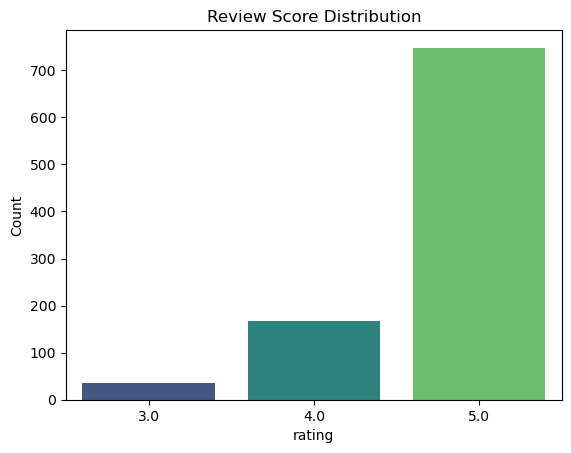

In [35]:
  # Plotting the score distribution
sns.countplot(data=df, x='rating', palette='viridis')
plt.title("Review Score Distribution")
plt.xlabel("rating")
plt.ylabel("Count")
plt.show()


In [37]:
# Sentiment Analysis
print("\nPerforming Sentiment Analysis...")
df['Sentiment'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))



Performing Sentiment Analysis...


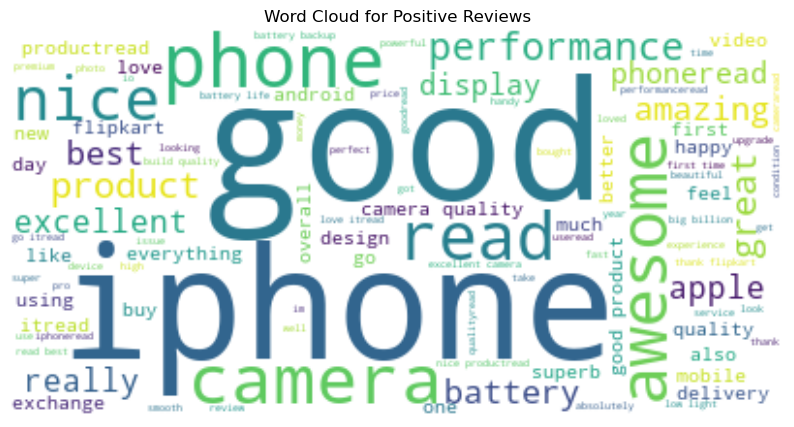

In [38]:
positive_reviews = " ".join(df[df['Sentiment_Label'] == 'Positive']['review'])
positive_wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=100).generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()

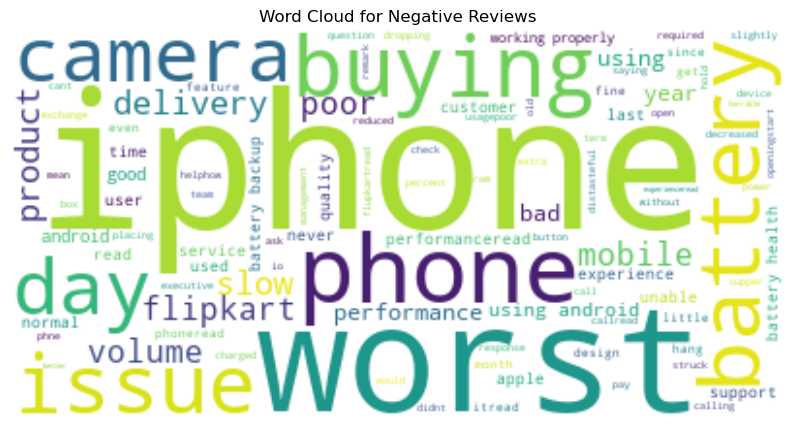

In [40]:
negative_reviews = " ".join(df[df['Sentiment_Label'] == 'Negative']['review'])
negative_wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=100).generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Reviews")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8100\2631771118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


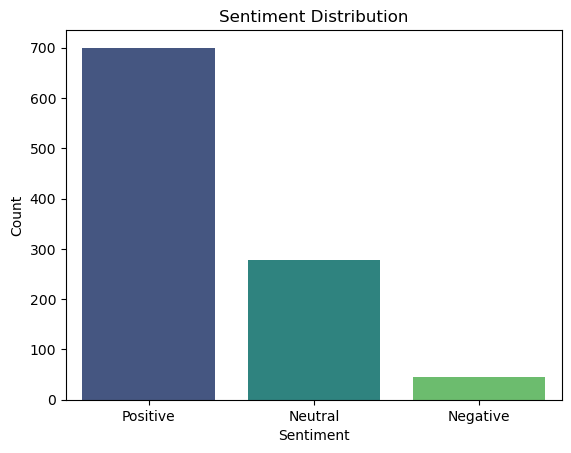

In [41]:
# Bar Chart for Review Sentiments
sentiment_counts = df['Sentiment_Label'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()